In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
import altair as alt

alt.data_transformers.enable("data_server")
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [10]:
path = "../../data/processed/pumpkins_processed.csv"
pumpkins_df = pd.read_csv(path)
train_df, test_df = train_test_split(pumpkins_df, test_size=0.3, random_state=123)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19607 entries, 6024 to 19966
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19607 non-null  object 
 1   place              19607 non-null  object 
 2   weight_lbs         19607 non-null  object 
 3   grower_name        19607 non-null  object 
 4   city               17645 non-null  object 
 5   state_prov         19607 non-null  object 
 6   country            19607 non-null  object 
 7   gpc_site           19607 non-null  object 
 8   seed_mother        13679 non-null  object 
 9   pollinator_father  12460 non-null  object 
 10  ott                17382 non-null  float64
 11  est_weight         17382 non-null  object 
 12  pct_chart          17382 non-null  float64
 13  variety            499 non-null    object 
dtypes: float64(2), object(12)
memory usage: 2.2+ MB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 17452 to 27277
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8404 non-null   object 
 1   place              8404 non-null   object 
 2   weight_lbs         8404 non-null   object 
 3   grower_name        8404 non-null   object 
 4   city               7587 non-null   object 
 5   state_prov         8404 non-null   object 
 6   country            8404 non-null   object 
 7   gpc_site           8404 non-null   object 
 8   seed_mother        5789 non-null   object 
 9   pollinator_father  5244 non-null   object 
 10  ott                7472 non-null   float64
 11  est_weight         7472 non-null   object 
 12  pct_chart          7472 non-null   float64
 13  variety            216 non-null    object 
dtypes: float64(2), object(12)
memory usage: 984.8+ KB


In [13]:
train_df.describe(include="all")

,id,place,weight_lbs,grower_name,city,state_prov,country,gpc_site,seed_mother,pollinator_father,ott,est_weight,pct_chart,variety
count,19607,19607,19607,19607,17645,19607,19607,19607,13679,12460,17382.000000,17382,17382.000000,499
unique,54,1780,6472,6510,2786,130,21,166,7640,3404,NaN,1523,NaN,65
top,2015-P,EXH,77.00,"Kline, Todd",Steam Mill,Other,United States,Ohio Valley Giant Pumpkin Growers Weigh-off,unknown,open,NaN,0.00,NaN,Big Zac
freq,1417,1309,40,80,208,1572,11904,559,195,1861,NaN,5459,NaN,246
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.238005,NaN,0.608503,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.896698,NaN,19.382001,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-100.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.000000,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.000000,NaN,3.000000,NaN


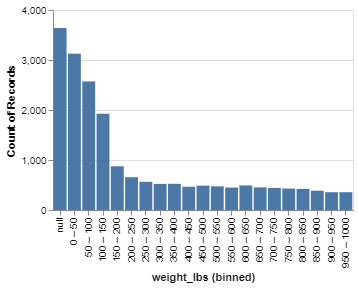

In [18]:
weight_dist_plot = (
    alt.Chart(train_df)
    .mark_bar()
    .encode(
        alt.X("weight_lbs", bin=alt.Bin(maxbins=40)),
        y="count()",
    )
    .properties(width=300, height=200)
)
weight_dist_plot

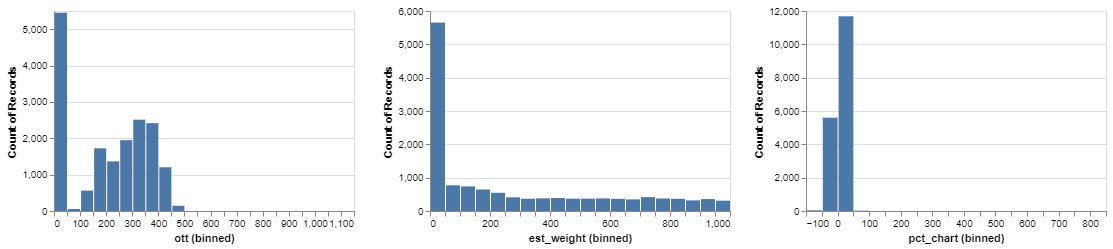

In [19]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=40)),
    y="count()",
).properties(width=300, height=200).repeat(["ott", "est_weight", "pct_chart"])

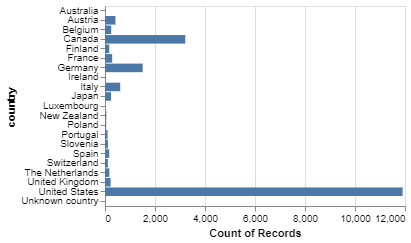

In [20]:
alt.Chart(train_df).mark_bar().encode(x="count()", y=alt.Y("country")).properties(
    width=300, height=200
)

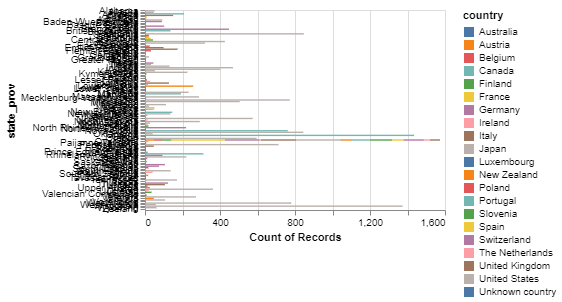